Miscellaneous data
basic

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

from scipy import stats

#### Noted equities - Summer, 2024.

In [2]:
symbols = [
    "BA",
    "INTC",
    "LPLA",
    "MU",
]

start = "2024-07-01"
end = "2024-10-01"

S = yf.download(symbols, start=start, end=end)["Close"]
S_N = S / S.iloc[0]

MEAN_N = S_N.mean(axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


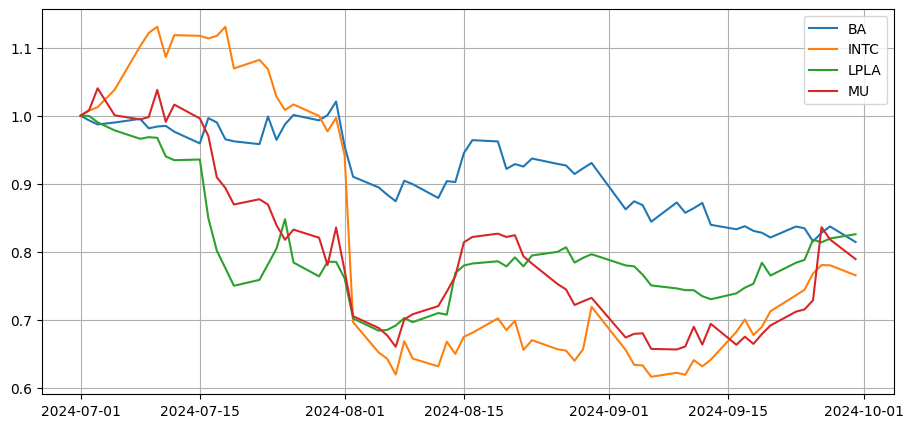

In [3]:
fig, ax1 = plt.subplots(figsize=(11, 5))
ax1.plot(S_N, label=S_N.columns)
plt.grid()
plt.legend()
plt.show()

In [4]:
# # IRR = (MEAN_N.loc["2024-08-07"] / MEAN_N.loc["2024-07-01"]) ** (251 / (MEAN_N.index.get_loc("2024-08-07") - MEAN_N.index.get_loc("2024-07-01"))) - 1
IRR = (MEAN_N.loc["2024-08-07"] / MEAN_N.loc["2024-07-10"]) ** (
    251 / (MEAN_N.index.get_loc("2024-08-07") - MEAN_N.index.get_loc("2024-07-10"))
) - 1
IRR = float(IRR)
print(
    f"Mean of {symbols} peak decline\ninternalized rate of return: {100*IRR:.0f}% (approx.)"
)

Mean of ['BA', 'INTC', 'LPLA', 'MU'] peak decline
internalized rate of return: -99% (approx.)


#### GSPC - Spring, 2025.

In [5]:
idx = "^GSPC"
start = "2025-02-01"
end = "2025-05-01"
IDX = yf.download(idx, start=start, end=end)["Close"]
IDX_N = IDX / IDX.iloc[0]

[*********************100%***********************]  1 of 1 completed


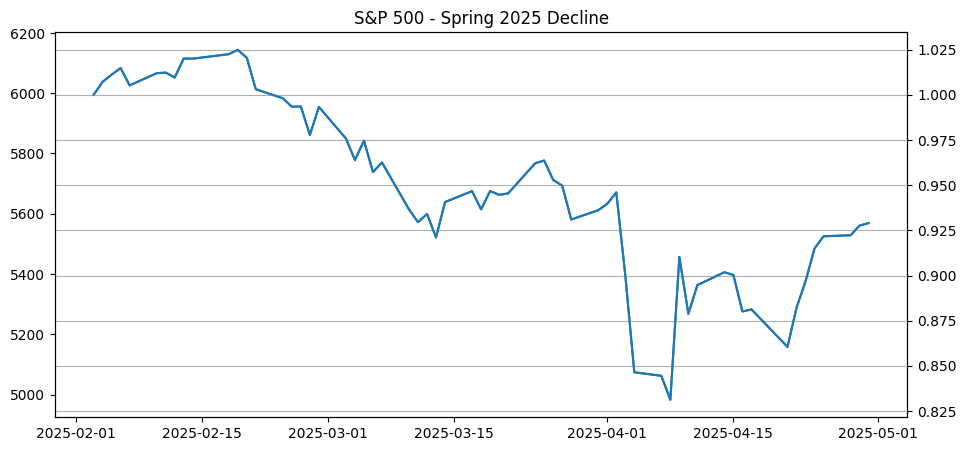

In [6]:
fig, ax1 = plt.subplots(figsize=(11, 5))
ax1.plot(IDX, label=idx)
ax2 = ax1.twinx()
ax2.plot(IDX_N)
plt.grid()
plt.title("S&P 500 - Spring 2025 Decline", fontsize=12)
plt.show()

In [7]:
IRR = (IDX.loc["2025-04-07"] / IDX.loc["2025-02-19"]) ** (
    251 / (IDX.index.get_loc("2025-04-07") - IDX.index.get_loc("2025-02-19"))
) - 1
IRR = float(IRR.iloc[0])
print(f"{idx} peak decline internalized rate of return: {100*IRR:.1f}% (approx.)")

^GSPC peak decline internalized rate of return: -77.1% (approx.)


#### Consistency in Declines

In [8]:
# alternative calculation possible.
symbols = [
    "BA",
    "INTC",
    "LPLA",
    "MU",
]

start = "2024-06-28"
end = "2024-10-01"

S = yf.download(symbols, start=start, end=end)["Close"]
S_N = S / S.iloc[0]
S_N["mean"] = S_N.mean(axis=1)

[*********************100%***********************]  4 of 4 completed


In [9]:
# correlation calculation
q = (IDX_N - 1).iloc[40] / (S_N["mean"].iloc[40] - 1)
x_, y_ = IDX_N["^GSPC"].iloc[:41] - 1, float(q.iloc[0]) * (S_N["mean"][:41] - 1)
x_, y_ = np.array(x_), np.array(y_)
coef = np.cov(x_, y_) / (np.std(x_) * np.std(y_))
COEF = float(coef[1][0])
c_s = f"Pearson Correlation Coefficient: {coef[0][1]:.3f}."
MSE = np.mean((y_ - x_) ** 2)
RMSE = MSE**0.5
r_s = f"RMSE: {RMSE:.3f}."
print(r_s)
print(c_s)
# print(COEF)

RMSE: 0.013.
Pearson Correlation Coefficient: 0.977.


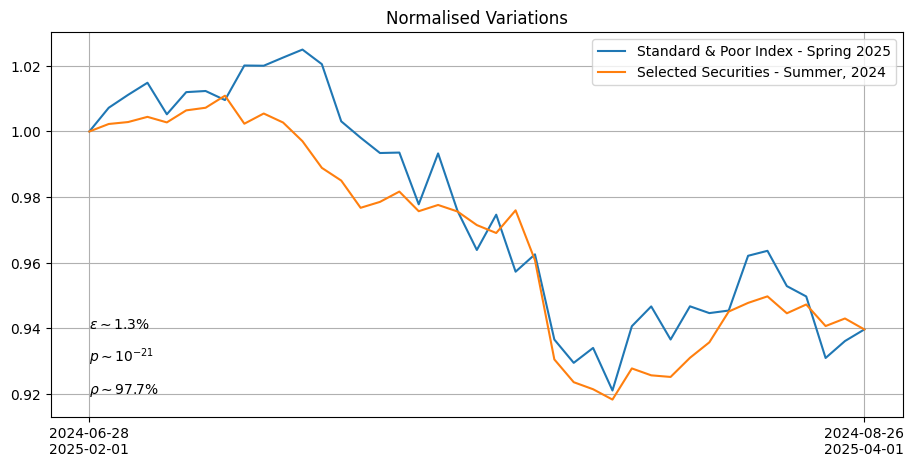

In [10]:
plt.figure(figsize=(11, 5))
plt.plot(1 + x_, label="Standard & Poor Index - Spring 2025")
plt.plot(1 + y_, label="Selected Securities - Summer, 2024")
plt.grid()
plt.title("Normalised Variations", fontsize=12)
plt.text(0, 0.93, "$p \sim 10^{-21}$")
plt.text(0, 0.92, f"$\\rho \sim ${100*coef[0][1]:.1f}%")
plt.text(0, 0.94, f"$\epsilon \sim ${100*RMSE:.1f}%")
plt.xticks([0 ,40], ["2024-06-28\n2025-02-01", "2024-08-26\n2025-04-01"])
# plt.ylim([0.6, 1.1])
plt.legend()
plt.show()